In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
import matplotlib.pyplot as plt

In [33]:
iris=pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
iris['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Seperating X and target variable Y

In [34]:
X=iris.iloc[:,0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y=iris['type']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: type, dtype: object

In [38]:
# Converting to numpy array
X=X.to_numpy()
y=y.to_numpy()

In [42]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [56]:
### Test Train Split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,shuffle = True,random_state=42)

In [59]:
print("Train size =",len(X_train))
print("Test size =",len(X_test))

Train size = 100
Test size = 50


### Training with KNeighborsClassifier

In [87]:
clf =KNeighborsClassifier(10)
clf.fit(X_train, y_train) # function to start training

KNeighborsClassifier(n_neighbors=10)

In [96]:
# Prediction on a test_data point

index = 24
test_data=X_test[index]
truth = y_test[index]
pred=clf.predict([test_data]) # function to predict
print("Sample test data =",test_data)
print("Prediction =",pred[0])
print("Ground Truth =",truth)


Sample test data = [7.9 3.8 6.4 2. ]
Prediction = Iris-virginica
Ground Truth = Iris-virginica


In [81]:
# Calcualting training accuracy 
train_acc=clf.score(X_train,y_train)
print("Training Accuracy",train_acc*100)
# Calcualting testing accuracy 
test_acc=clf.score(X_test,y_test)
print("Testing Accuracy",test_acc*100)

Training Accuracy 96.0
Testing Accuracy 98.0


### Confusion Matrix for predictions

In [116]:

def plotConfusionMatrix(mat):
    # Normalise
    # normalized_mat = mat.astype('float') /mat.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(mat,index=iris['type'].unique(),columns=iris['type'].unique())
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1)  # for label size
    sns.heatmap(df_cm, annot=True,fmt='d', cbar=False)  # font size

    plt.show()

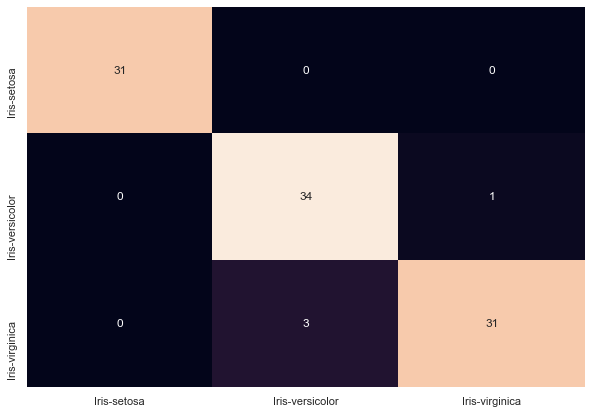

In [117]:
predictions = clf.predict(X_train)
grount_truth = y_train
confusion_mat=confusion_matrix(grount_truth,predictions)
plotConfusionMatrix(confusion_mat)